# Visualization of FFT, Filtering, and Spectrograms


In [10]:
# Import necessary libraries

import pandas as pd                      # Data manipulation and analysis
import numpy as np                       # Numerical operations and array handling

import matplotlib.pyplot as plt          # Plotting and visualization
import seaborn as sns                    # Statistical data visualization (built on Matplotlib)
import matplotlib as mpl                 # Matplotlib configuration
mpl.rcParams['figure.dpi'] = 100         # Set figure resolution

from numpy.fft import fft, ifft          # Fast Fourier Transform and its inverse
from numpy.fft import fftshift, ifftshift  # Frequency shifting utilities

from scipy import signal                 # Signal processing tools
from scipy.io import wavfile             # Read and write WAV files

import IPython.display as ipd            # Audio playback in notebooks


# Exercises

Exercise 1 – Audio File Analysis ()

Task:
1. Load the audio file: './Jungle-SoundBible.com-1211567897.wav'.
   - You may ignore one of the stereo channels (use mono).
2. Print the following information:
   - Total number of samples
   - Duration of the audio (in seconds)
   - Sampling rate
3. Listen to the audio file.
4. Visualize the following:
   - Time-domain waveform (time series)
   - Frequency spectrum using FFT
   - Spectrogram

Notes:
- Label all axes clearly and meaningfully.
- Use appropriate titles or legends if necessary.

**Printing datas**

In [21]:
sample_rate, data = wavfile.read('./Jungle-SoundBible.com-1211567897.wav')

# Choosing one channel
data = data[:,0]

# Printing the number of samples, length of file in secs and the sample rate in secs
number_of_samples = len(data)
length_in_seconds = len(data)/sample_rate

print("Number of Samples:", number_of_samples)
print("Length in Seconds:", length_in_seconds)
print("Samples per Second:", sample_rate)

# Playing the file
ipd.Audio(data, rate = sample_rate )


Number of Samples: 119808
Length in Seconds: 5.433469387755102
Samples per Second: 22050


**Plotting of Time Series**

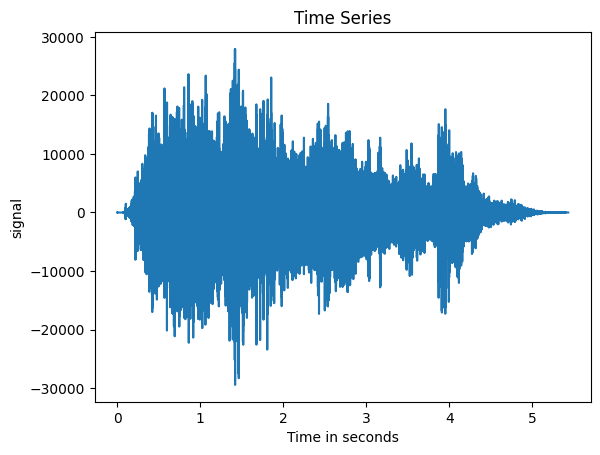

In [22]:
# Plotting Time Series

x = np.arange(number_of_samples) / sample_rate
plt.plot(x, data)
plt.xlabel('Time in seconds')  # in x-axis
plt.ylabel('signal') # in y-axis
plt.title('Time Series')

plt.show()

**Plotting of Spectrum**

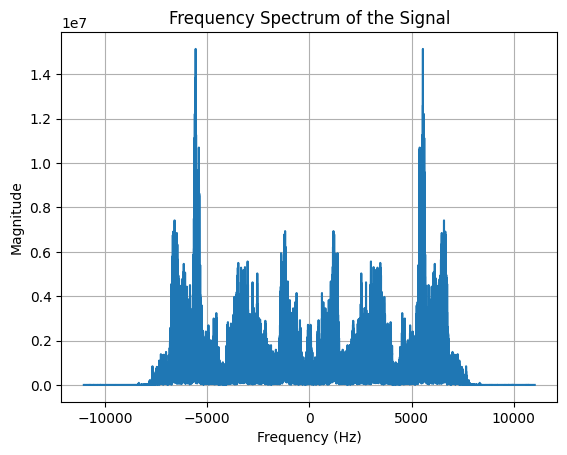

In [23]:
# Plotting Spectrum

spectrum = fft(data)
spectrum_shifted = fftshift(spectrum)
magnitude = np.abs(spectrum_shifted)

n = len(data)
freq = np.linspace(-sample_rate / 2, sample_rate / 2, n)

plt.plot(freq, magnitude)
plt.title("Frequency Spectrum of the Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.show()


**Plotting of Spectrogram**

[-1  1  0 ...  1  0 -1] 22050


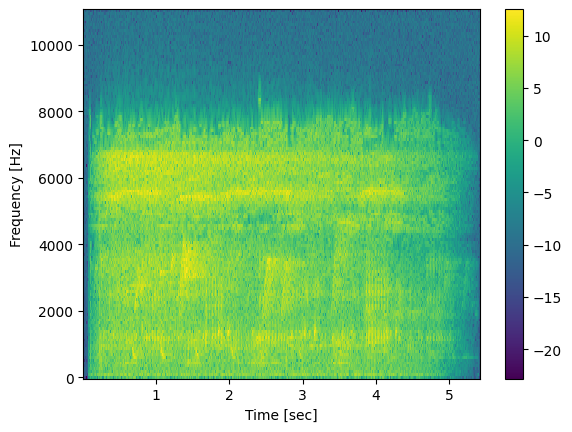

In [24]:
# Calculate the spectrogram
f, t, Sxx = signal.spectrogram(data, sample_rate)
print(data, sample_rate)

# note that we use the logarithm before visualisation
plt.pcolormesh(t, f, np.log(Sxx))
plt.ylabel('Frequency [Hz]')

plt.xlabel('Time [sec]')

plt.colorbar()

plt.show()


Exercise 2 – Frequency-Based Animal Sound Isolation

Task:
The provided audio contains sounds from different animals. Your goal is to isolate the sounds of three distinct animal types using frequency-domain filtering.

Instructions:
1. Analyze the spectrogram to identify which frequency bands correspond to each animal.
   - Use `plt.xlim()` and `plt.ylim()` to zoom in on regions of interest.
   - Adjust `vmin` and `vmax` in the spectrogram plot for better visibility of different sounds.

2. Design three bandpass filters:
   - Each filter should isolate the frequency range of one animal type.
   - The filter should suppress frequencies outside the target animal's range.

3. Apply each filter to the original audio signal.

4. Listen to the filtered audio:
   - Ensure that the desired animal sound is isolated with minimal interference.

5. Plot a spectrogram for each of the three filtered signals:
   - Clearly label axes.
   - Use appropriate scaling and titles for clarity.


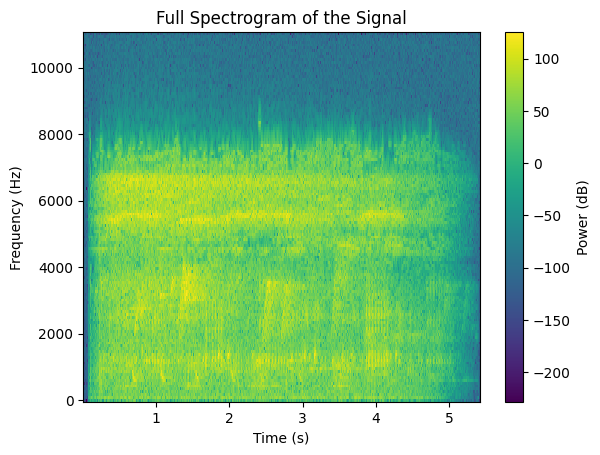

In [25]:
# Full spectrogram to identify types of animals
frequencies, times, Sxx = signal.spectrogram(data, fs=sample_rate)
plt.pcolormesh(times, frequencies, 10 * np.log(Sxx))
plt.colorbar(label="Power (dB)")
plt.title("Full Spectrogram of the Signal")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.show()

In [29]:
# Performing FFT filter for each animal types
def fft_filter(data, sample_rate, lowcut, highcut):
    
    # Perform FFT
    freq_data = np.fft.fft(data)
    freqs = np.fft.fftfreq(len(data), 1 / sample_rate)

    # Zero out frequencies outside the desired range
    filtered_freq_data = np.copy(freq_data)
    filtered_freq_data[(freqs < lowcut) | (freqs > highcut)] = 0

    # Apply Inverse FFT to get the filtered signal
    filtered_signal = np.fft.ifft(filtered_freq_data).real
    return filtered_signal

# Filter for each types of animals
filtered_low = fft_filter(data, sample_rate, 20, 3000)
filtered_mid = fft_filter(data, sample_rate, 3000, 7000)
filtered_high = fft_filter(data, sample_rate, 7000, 11000)

# Play the filtered sounds of animals
ipd.display(ipd.Audio(filtered_low, rate=sample_rate))
ipd.display(ipd.Audio(filtered_mid, rate=sample_rate))
ipd.display(ipd.Audio(filtered_high, rate=sample_rate))

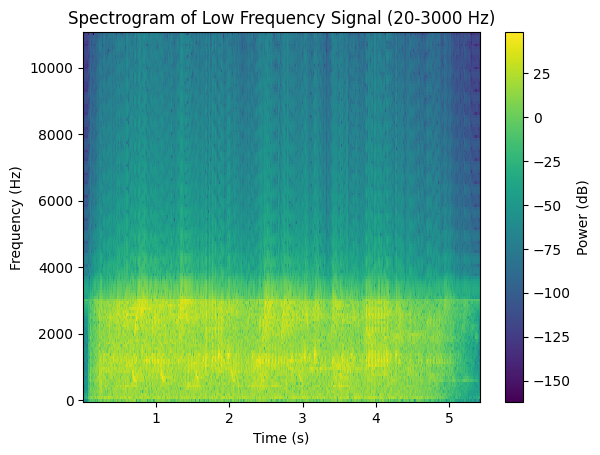

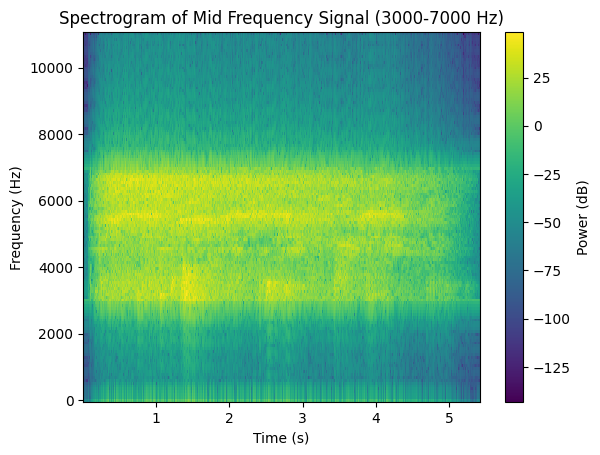

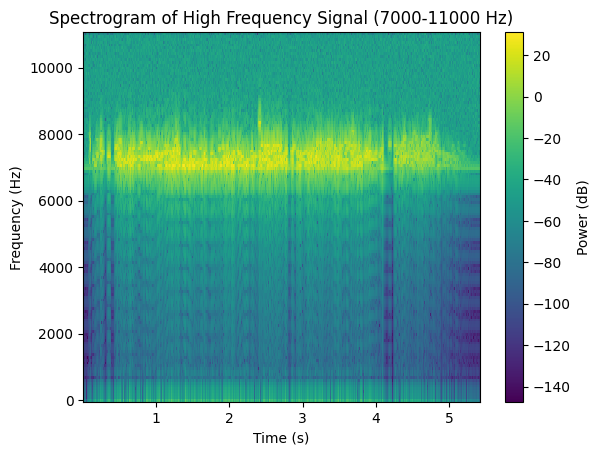

In [27]:
# Plotting Spectrogram

def plot_spectrogram(data, sample_rate, title):
    frequencies, times, Sxx = signal.spectrogram(data, sample_rate)
    plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx))
    plt.colorbar(label="Power (dB)")
    plt.title(title)
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.show()

# Plot spectrograms for each filtered signal of types of animals
plot_spectrogram(filtered_low, sample_rate, "Spectrogram of Low Frequency Signal (20-3000 Hz)")
plot_spectrogram(filtered_mid, sample_rate, "Spectrogram of Mid Frequency Signal (3000-7000 Hz)")
plot_spectrogram(filtered_high, sample_rate, "Spectrogram of High Frequency Signal (7000-11000 Hz)")

Exercise 3 – Smooth Frequency Filtering with Convolution (2 marks)

Task:
Until now, you've used ideal (brick-wall) filters, where frequency components are either fully retained or completely removed (weights 1 or 0).

In this exercise:
1. Design a smoother filter using convolution (e.g., using a Gaussian or Hann window).
   - The filter should gradually transition between passband and stopband.
   - Apply it to isolate one of the previously filtered animal sounds.

2. Visualize the filter:
   - Plot the filter weights in the frequency domain to show the smooth transition.

3. Apply the filter to the original signal.

4. Plot the resulting spectrogram:
   - Ensure all axes are labeled appropriately.
   - Compare how the smoother filter affects the isolation compared to the brick-wall filters.


**Applying Brick wall filter using Gaussian window to smoothen**

In [32]:
# Perform FFT
freq_data = np.fft.fft(data)
freqs = np.fft.fftfreq(len(data), 1 / sample_rate)

lowcut = 1000
highcut = 3000
brick_wall_filter = np.zeros_like(spectrum)
brick_wall_filter[(freqs >= lowcut) & (freqs <= highcut)] = 1
brick_wall_filter[(freqs <= -lowcut) & (freqs >= -highcut)] = 1

# Create a Gaussian window to smooth the brick wall filter
kernel_size = 100  # Length of the Gaussian kernel
std_dev = 20       # Standard deviation for the Gaussian
gaussian_window = signal.windows.gaussian(kernel_size, std_dev)

# Convolve the brick wall filter with the Gaussian window to smooth it
smooth_filter = np.convolve(brick_wall_filter, gaussian_window, mode='same')
smooth_filter = smooth_filter / np.max(smooth_filter)  # Normalize the filter to a max of 1

# Apply the smooth filter to the FFT data
filtered_spectrum = spectrum * smooth_filter

# Perform Inverse FFT to get the filtered signal
filtered_signal = np.fft.ifft(filtered_spectrum).real

**Plotting Gaussian Window Filter Weights**

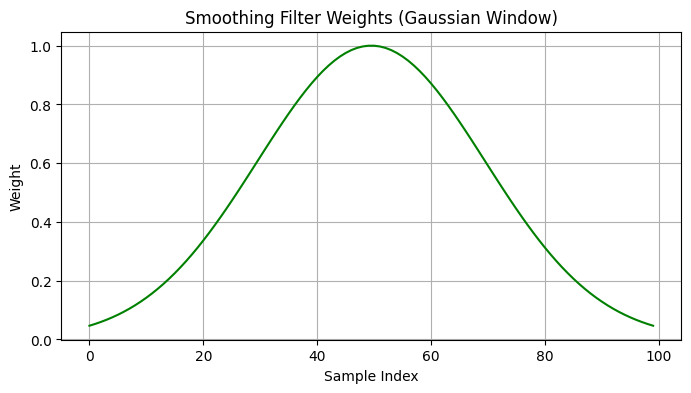

In [33]:
# Plot the Gaussian window filter weights
plt.figure(figsize=(8, 4))
plt.plot(gaussian_window, label="Gaussian Window", color="green")
plt.title("Smoothing Filter Weights (Gaussian Window)")
plt.xlabel("Sample Index")
plt.ylabel("Weight")
plt.grid(True)
plt.show()

**Plotting Filtered Signal Spectrogram**

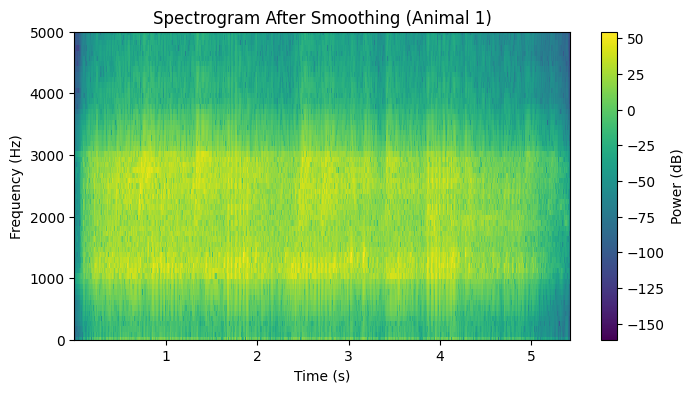

In [34]:
# Plot the spectrogram of the filtered signal
frequencies, times, Sxx = signal.spectrogram(filtered_signal, sample_rate)
plt.figure(figsize=(8, 4))
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), cmap='viridis')
plt.colorbar(label="Power (dB)")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.title("Spectrogram After Smoothing (Animal 1)")
plt.ylim([0, 5000])  # Limit frequency range to zoom in
plt.show()

**Playing Filtered signal**

In [35]:
# Play the filtered signal
ipd.Audio(filtered_signal, rate=sample_rate)